In [1]:
#Get center cut images from s3 bucke

In [1]:
from skimage import io
from sklearn.metrics import f1_score
import os
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
import s3fs
fs = s3fs.S3FileSystem()

#### list the folders in s3 bucket

In [3]:
fs.ls('dev-pdi-training-images/footprint/from-elu-sm-instance/')[:5]

['dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-f1-score.csv',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/9k-train-images',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/15k_images',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-center-cut',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-pred-center-cut']

### Store paths in variable

In [4]:
test_images_label_cc_path = 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-center-cut'
test_pred_images_cc_path = 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-pred-center-cut'

#### VIEW 190 test image's  label -  center cut images

In [5]:
ls_test_label_cc = fs.ls(test_images_label_cc_path)

In [6]:
ls_test_label_cc[:3]

['dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-center-cut/image_1.tif',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-center-cut/image_10.tif',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-center-cut/image_100.tif']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


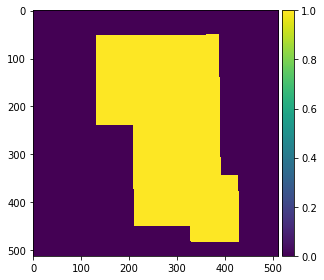

In [7]:
img = io.imread(fs.open(ls_test_label_cc[0]))
io.imshow(img)

#### VIEW - 190 test images prediction output - center cut images

In [8]:
ls_test_pred_image_cc = fs.ls(test_pred_images_cc_path)

In [9]:
ls_test_pred_image_cc[:3]

['dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-pred-center-cut/image_1.tif',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-pred-center-cut/image_10.tif',
 'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-pred-center-cut/image_100.tif']

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


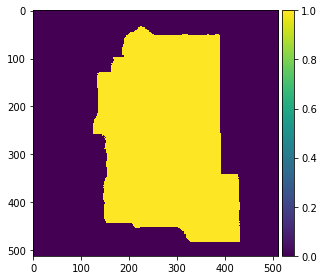

In [10]:
img1 = io.imread(fs.open(ls_test_pred_image_cc[0]))
io.imshow(img1)

#### Display test label images center cut and test prediction images centre cut images

In [49]:
img_to_view = 127

In [50]:
test_pred_img = io.imread(fs.open(f'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-pred-center-cut/image_{img_to_view}.tif'))
test_lbl_img = io.imread(fs.open(f'dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-center-cut/image_{img_to_view}.tif'))

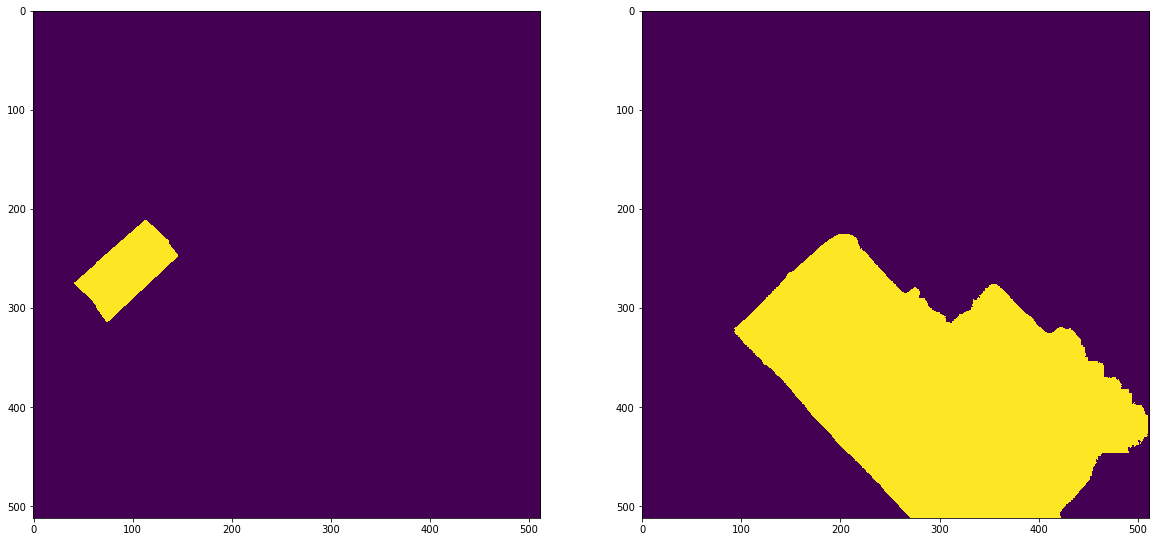

In [51]:

no_of_rows = 1
no_of_cols = 2

fig = plt.figure(figsize=(20,20))
# img_knt = 1
# for file in ls_test_label_cc[126:128]:
    #Read test label center cut image
# test_lbl_img = io.imread(fs.open(ls_test_label_cc[img_to_view]))
fig.add_subplot(no_of_rows,no_of_cols, 1)
plt.imshow(test_lbl_img)
# img_knt += 1

#Read test prediction center cut image
# _, filename_with_extn = os.path.split(ls_test_label_cc[img_to_view])
# test_pred_cc_path = os.path.join(test_pred_images_cc_path, filename_with_extn)
# test_pred_img = io.imread(fs.open(test_pred_cc_path))
fig.add_subplot(no_of_rows, no_of_cols, 2)
# img_knt += 1
plt.imshow(test_pred_img)
    
plt.show()

#### Find f1 score

In [16]:
# lst_f1_micro = []
# lst_f1_macro = []
# lst_f1_samples = []
# lst_f1_weighted = []
# lst_img_names = []

# for idx, file in enumerate(ls_test_label_cc):
#     print('processing ', idx+1)
file = ls_test_label_cc[img_to_view]
#Read test label center cut image
test_lbl_img = io.imread(fs.open(file))

#Read test prediction center cut image
_, filename_with_extn = os.path.split(file)
test_pred_cc_path = os.path.join(test_pred_images_cc_path, filename_with_extn)
test_pred_img = io.imread(fs.open(test_pred_cc_path))

print('filename ', filename_with_extn)
print('micro', f1_score(test_lbl_img, test_pred_img, average='micro'))
print('macro', f1_score(test_lbl_img, test_pred_img, average='macro'))
print('samples', f1_score(test_lbl_img, test_pred_img, average='samples'))
print('weighted', f1_score(test_lbl_img, test_pred_img, average='weighted'))

# rlt_rows = list(zip(lst_img_names, lst_f1_micro, lst_f1_macro, lst_f1_samples, lst_f1_weighted))
# rlt_rows

filename  image_42.tif
micro 0.9278310144660463
macro 0.5458503456876395
samples 0.28239092869685795
weighted 0.9241097392727082


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn

In [106]:
df = pd.DataFrame(rlt_rows, columns=['image name','micro', 'macro', 'samples', 'weighted'])
df

,image name,micro,macro,samples,weighted
0,image_1.tif,0.906202,0.508952,0.763949,0.921923
1,image_10.tif,0.988124,0.653376,0.536328,0.989895
2,image_100.tif,0.955774,0.725167,0.516179,0.953420
3,image_101.tif,0.989328,0.577385,0.570018,0.992821
4,image_102.tif,0.991603,0.548954,0.656315,0.991912
5,image_103.tif,0.985490,0.768325,0.650868,0.985749
6,image_104.tif,0.991504,0.494833,0.512521,0.994294
7,image_105.tif,0.986929,0.641760,0.607394,0.986613
8,image_106.tif,0.993118,0.736862,0.676115,0.993110
9,image_107.tif,0.988296,0.569872,0.589654,0.991597


In [107]:
bytes_to_write = df.to_csv(None).encode()

with fs.open("dev-pdi-training-images/footprint/from-elu-sm-instance/190-test-images-f1-score.csv",'wb') as f:
    f.write(bytes_to_write)